<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DS-SF-42 | Class 8 | Regression - Addressing model fit

<br>
### _Predicting shots made per game by Kobe Bryant_

_Authors: Kiefer Katovich (SF) and Gus Ostow (SF)_

---

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression will cause issues that other datasets might not. In this exploration you will be diagnose issues with model fit using regression metrics, train/test split, and cross validation.


### Plan

Today I am going to flip the script: we are going to start the class with a hands-on partner activity to motivate the day's topic, then address the theory after.

1. Motivating the problem
3. Slides interlude
2. Addressing the problem

### Teams

<img src=https://i.imgur.com/JI6ydY5.png align=left>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# <font color=blue>Part I</font> - Motifivating the problem


---

### 1. Load packages and data

In [177]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [6]:
kobe = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2. Examine the data

#### Guiding questions

- How many columns are there? 
- Examine what the observations (rows) and columns represent.
- Why does this dataset _feel_ different than the datasets we've touched so far?
- What concerns do you have even before fitting your first model?

In [7]:
len(kobe)

1558

In [13]:
# A:
kobe.describe()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,...,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,7.358793,0.500642,0.001284,0.001284,0.000642,0.000642,0.001284,0.001284,0.000642,0.000642,...,0.000064,0.006207,0.002047,0.000032,0.014149,0.000050,0.000433,0.031766,42.946727,780.486521
std,3.471180,0.500160,0.035817,0.035817,0.025335,0.025335,0.035817,0.035817,0.025335,0.025335,...,0.001791,0.022033,0.011133,0.001267,0.041313,0.001390,0.004902,0.049402,26.048206,449.923227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,391.250000
50%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,780.500000
75%,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,63.000000,1169.750000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.050000,0.250000,0.133333,0.050000,0.533333,0.041667,0.111111,0.352941,105.000000,1559.000000


In [39]:
kobe

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,5,5
5,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,6,6
6,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,7,7
7,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,8,8
8,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,9,9
9,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,10,10


In [35]:
kobe[100:110]

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
100,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,27,102
101,5.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,28,103
102,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,29,104
103,5.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,30,105
104,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,31,106
105,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,32,107
106,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,33,108
107,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,34,109
108,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,35,110
109,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,36,111


In [36]:
kobe.MINUTES_REMAINING

0         0.0
1        10.0
2        19.0
3        31.0
4        19.0
5         9.0
6         1.0
7        33.0
8        21.0
9         2.0
10       24.0
11       45.0
12       17.0
13        3.0
14        7.0
15       31.0
16       51.0
17        6.0
18       21.0
19       21.0
20        3.0
21       26.0
22       41.0
23       47.0
24       44.0
25       71.0
26        4.0
27       40.0
28       72.0
29       38.0
        ...  
1528     45.0
1529     54.0
1530     84.0
1531    114.0
1532     91.0
1533    124.0
1534    134.0
1535     94.0
1536    104.0
1537    130.0
1538    134.0
1539     62.0
1540     84.0
1541     12.0
1542     99.0
1543     86.0
1544     54.0
1545    117.0
1546     56.0
1547    111.0
1548     89.0
1549     71.0
1550     46.0
1551    127.0
1552     69.0
1553    106.0
1554     83.0
1555     95.0
1556     63.0
1557    251.0
Name: MINUTES_REMAINING, Length: 1558, dtype: float64

In [134]:
i = 21
Descriptors1 = abs(kobe.corr()["SHOTS_MADE"]).sort_values()[644-i:644].index
abs(kobe.corr()["SHOTS_MADE"]).sort_values()

ACTION_TYPE:turnaround_finger_roll_shot    0.000266
SEASON_OPPONENT:sas:2008-09                0.000322
SEASON_OPPONENT:sea:1999-00                0.000322
ACTION_TYPE:driving_bank_shot              0.000400
SEASON_OPPONENT:min:2003-04                0.000559
ACTION_TYPE:finger_roll_layup_shot         0.000650
SEASON_OPPONENT:por:2000-01                0.001351
SEASON_OPPONENT:dal:2010-11                0.001415
SEASON_OPPONENT:chi:1997-98                0.001459
SEASON_OPPONENT:cha:2000-01                0.001459
SEASON_OPPONENT:det:1999-00                0.001459
SEASON_OPPONENT:ind:2002-03                0.001459
SEASON_OPPONENT:orl:2006-07                0.001459
SEASON_OPPONENT:det:2010-11                0.001459
SEASON_OPPONENT:ind:2001-02                0.001459
SEASON_OPPONENT:njn:2010-11                0.001459
SEASON_OPPONENT:tor:2012-13                0.001459
SEASON_OPPONENT:bos:2011-12                0.001459
SEASON_OPPONENT:ind:2005-06                0.001459
SEASON_OPPON

In [107]:
Descriptors = ["SHOT_ZONE_BASIC:above_the_break_3","SHOT_ZONE_RANGE:24+_ft.","SEASON:1996-97","SHOT_ZONE_AREA:left_side_center(lc)","SHOT_ZONE_AREA:left_side(l)","COMBINED_SHOT_TYPE:layup","SHOT_ZONE_AREA:right_side_center(rc)","SHOT_ZONE_BASIC:in_the_paint_(non-ra)","SHOT_ZONE_AREA:right_side(r)","SHOT_ZONE_BASIC:restricted_area","SHOT_ZONE_RANGE:8-16_ft.","SHOT_ZONE_RANGE:less_than_8_ft.","SHOT_ZONE_RANGE:16-24_ft.","SHOT_ZONE_BASIC:mid-range","SHOT_ZONE_AREA:center(c)","COMBINED_SHOT_TYPE:jump_shot","SECONDS_REMAINING","SHOT_TYPE:2pt_field_goal"]

Descriptors1

Index([u'COMBINED_SHOT_TYPE:layup', u'SHOT_ZONE_AREA:right_side_center(rc)',
       u'SHOT_ZONE_BASIC:in_the_paint_(non-ra)',
       u'SHOT_ZONE_AREA:right_side(r)', u'SHOT_ZONE_BASIC:restricted_area',
       u'SHOT_ZONE_RANGE:8-16_ft.', u'SHOT_ZONE_RANGE:less_than_8_ft.',
       u'SHOT_ZONE_RANGE:16-24_ft.', u'SHOT_ZONE_BASIC:mid-range',
       u'SHOT_ZONE_AREA:center(c)', u'MINUTES_REMAINING',
       u'COMBINED_SHOT_TYPE:jump_shot', u'PERIOD', u'SECONDS_REMAINING',
       u'SHOT_TYPE:2pt_field_goal'],
      dtype='object')

---

### 3.  Prepare the dataset for training AND validation

- Make predictor matrix `X` and target variable `y`
- Split your data into a validation set using `train_test_split`

In [143]:
# A:
y = kobe.SHOTS_MADE #shots made is target variable
q = kobe.columns #name of all columns
q1 = q[1:len(q)] #columns 2 through the end
X = kobe[q1] #matrix of columns 2 through the end
X3 = kobe.drop("SHOTS_MADE", axis = 1)
X2 = kobe[Descriptors1]

In [114]:
X_train, X_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.33, random_state=1)
X_train

,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,SEASON_OPPONENT:atl:2005-06,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
589,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.034483,4,591
315,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.068966,0.000000,0.0,0.000000,0.0,0.0,0.000000,7,317
719,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.045455,48,721
1430,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,58,1432
1181,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.181818,0.0,0.0,0.000000,67,1183
1189,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.071429,75,1191
683,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,12,685
799,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,62,801
692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.043478,21,694
834,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,10,836


In [117]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

lm2 = LinearRegression()
model2 = lm2.fit(X2_train, y_train)
predictions2 = model2.predict(X2_test)
score2 = model2.score(X2_test, y_test)


print "score: ", score
print "score2: ", score2

score:  -1.03788848109e+14
score2:  0.62908563461


In [154]:
score_array = []
max_value_array = []
for a in range(1,6):
    y = kobe.SHOTS_MADE #shots made is target variable
    q = kobe.columns #name of all columns
    q1 = q[1:len(q)] #columns 2 through the end

    resultsarray = []
    Descriptors_array = []

    for i in range(1,30):
        if i not in (3,5):
            Descriptors_array.append(abs(kobe.corr()["SHOTS_MADE"]).sort_values()[644-i:644].index[0])
            X = kobe[Descriptors_array]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=a)

            lm = LinearRegression()
            model = lm.fit(X_train, y_train)
            predictions = model.predict(X_test)
            score = model.score(X_test, y_test)
            resultsarray.append(score)

    max_value = resultsarray.index(max(resultsarray)) + 2  #add 2 for the 2 values we are removing      

    Descriptors_array = []

    for i in range(1,max_value + 2): #add 2 to offset from 1-based and -1 end value
        if i not in (3,5):
            Descriptors_array.append(abs(kobe.corr()["SHOTS_MADE"]).sort_values()[644-i:644].index[0])

    X = kobe[Descriptors_array]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=a)

    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    score_array.append(score)
    max_value_array.append(max_value)

print score_array
print max_value_array

KeyboardInterrupt: 

In [153]:
print [0.63315556401438911, 0.66735139893842277, 0.67291016881754995, 0.66821855410494557, 0.66415962219942559]
print [20, 26, 27, 27, 14]

[0.6331555640143891, 0.6673513989384228, 0.67291016881755, 0.6682185541049456, 0.6641596221994256]
[20, 26, 27, 27, 14]


In [142]:
import itertools

stuff = [1, 2, 3]
for L in range(0, len(stuff)+1):
  for subset in itertools.combinations(stuff, L):
    print(subset)

()
(1,)
(2,)
(3,)
(1, 2)
(1, 3)
(2, 3)
(1, 2, 3)


---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

1. How does it perform? Keep the regression metrics we talked about on Tuesday in mind, like mean squared error, mean absolute error, and $R^2$
2. Is there a disparity between your train set and your test set? What does that indicate?

In [5]:
# A:

# <font color=blue> Interlude</font> - Slides

Sit back and enjoy the show...

----
# <font color=blue> Part II</font> - Addressing the problem

---

### 6. Try fitting ealuating a  `Ridge` model instead of a standard `LinearRegression`
The ridge regression is a model _similar_ to the standard linear regression, but for now let it remain shrouded in an \*air\* of mystery.

Is it better than the Linear regression? On the training set? On the test set? Why do you think that is?

In [188]:
# A:
score_array = []
max_value_array = []
for a in range(1,6):
    y = kobe.SHOTS_MADE #shots made is target variable
    q = kobe.columns #name of all columns
    q1 = q[1:len(q)] #columns 2 through the end
    #a = 1

    resultsarray = []
    Descriptors_array = []

    for i in range(1,30):
        if i not in (3,5):
            Descriptors_array.append(abs(kobe.corr()["SHOTS_MADE"]).sort_values()[644-i:644].index[0])
            X = kobe[Descriptors_array]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=a)

            #lm = LinearRegression()
            ri = Ridge(alpha = 10000)
            model_ridge = ri.fit(X_train, y_train)
            predictions_ridge = model_ridge.predict(X_test)
            score_ridge = model_ridge.score(X_test, y_test)
            resultsarray.append(score_ridge)

    max_value = resultsarray.index(max(resultsarray)) + 2  #add 2 for the 2 values we are removing      

    Descriptors_array = []

    for i in range(1,max_value + 2): #add 2 to offset from 1-based and -1 end value
        if i not in (3,5):
            Descriptors_array.append(abs(kobe.corr()["SHOTS_MADE"]).sort_values()[644-i:644].index[0])

    X = kobe[Descriptors_array]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=a)

    ri = Ridge(alpha = 10000)
    model_ridge = ri.fit(X_train, y_train)
    predictions_ridge = model_ridge.predict(X_test)
    score_ridge = model_ridge.score(X_test, y_test)
    score_array.append(score_ridge)
    max_value_array.append(max_value)

print score_array
print max_value_array

[0.63205396985878215, 0.66622314261820592, 0.66970187247114987, 0.66468696830671115, 0.66156967787604359]
[22, 22, 22, 22, 28]


In [189]:
print "alpha = 1 (default)"
print [0.6331657805660631, 0.66727563354396269, 0.67371145484313533, 0.66750998785287341, 0.66414308919365794]
print [20, 26, 27, 28, 14]

print "\nalpha = 10000"
print [0.63205396985878215, 0.66622314261820592, 0.66970187247114987, 0.66468696830671115, 0.66156967787604359]
print [22, 22, 22, 22, 28]

alpha = 1 (default)
[0.6331657805660631, 0.6672756335439627, 0.6737114548431353, 0.6675099878528734, 0.6641430891936579]
[20, 26, 27, 28, 14]

alpha = 10000
[0.6320539698587821, 0.6662231426182059, 0.6697018724711499, 0.6646869683067111, 0.6615696778760436]
[22, 22, 22, 22, 28]


---
### 7. Examine your ridge model's coefficients

Does anything jump out at you? Use any the tools we've learned so far like histograms, barplots, and other descriptive statistics to compare the ridge model's fit to the linear regression we used earlier.


In [218]:
# A:
X = kobe.drop('SHOTS_MADE', axis = 1)
y = kobe['SHOTS_MADE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


rd = Ridge(alpha = 10000)

rd.fit(X_train, y_train)


rd_r2_train = rd.score(X_train, y_train)
rd_r2_test = rd.score(X_test, y_test)

#print "R2 on train: {}".format(rd_r2_train)
#print "R2 on test: {}".format(rd_r2_test)

Coefficients = pd.DataFrame(zip(X_train, rd.coef_), columns=("feature", "coef"))
Coefficients.sort_values("coef", ascending=False)



,feature,coef
574,SHOT_TYPE:2pt_field_goal,0.071530
566,SHOT_ZONE_BASIC:restricted_area,0.055382
569,SHOT_ZONE_AREA:center(c),0.045762
577,COMBINED_SHOT_TYPE:dunk,0.044325
579,COMBINED_SHOT_TYPE:jump_shot,0.035715
560,SHOT_ZONE_RANGE:less_than_8_ft.,0.031772
584,PERIOD,0.029006
565,SHOT_ZONE_BASIC:mid-range,0.022585
558,SHOT_ZONE_RANGE:8-16_ft.,0.020132
572,SHOT_ZONE_AREA:right_side_center(rc),0.019681


---

### 8. Play around with the `alpha` hyper parameter

How does this impact the coefficients of the fit model?

#### EX:
```python
ridge = Ridge(alpha = 10.0)
```

Some good values to try might be `0`, `0.1`, `1.0`, `10`, `100`

In [190]:
alpha_values = [0.1, 1.0, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
test_scores = []
for a in alpha_values:
    X = kobe.drop('SHOTS_MADE', axis = 1)
    y = kobe['SHOTS_MADE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


    rd = Ridge(alpha = a)

    rd.fit(X_train, y_train)


    rd_r2_train = rd.score(X_train, y_train)
    rd_r2_test = rd.score(X_test, y_test)
    
    print a
    print "R2 on train: {}".format(rd_r2_train)
    print "R2 on test: {}".format(rd_r2_test)
    print "\n"
    test_scores.append(rd_r2_test)

0.1
R2 on train: 0.854682765752
R2 on test: 0.411350152063


1.0
R2 on train: 0.826128888379
R2 on test: 0.543146187214


10
R2 on train: 0.732867421798
R2 on test: 0.620260216028


100
R2 on train: 0.677750902789
R2 on test: 0.62792929167


1000
R2 on train: 0.656125354604
R2 on test: 0.634849864324


10000
R2 on train: 0.62319681226
R2 on test: 0.630555381752


100000
R2 on train: 0.591217693231
R2 on test: 0.614557013021


1000000
R2 on train: 0.565643193237
R2 on test: 0.592593622159


10000000
R2 on train: 0.540857900499
R2 on test: 0.55782326246




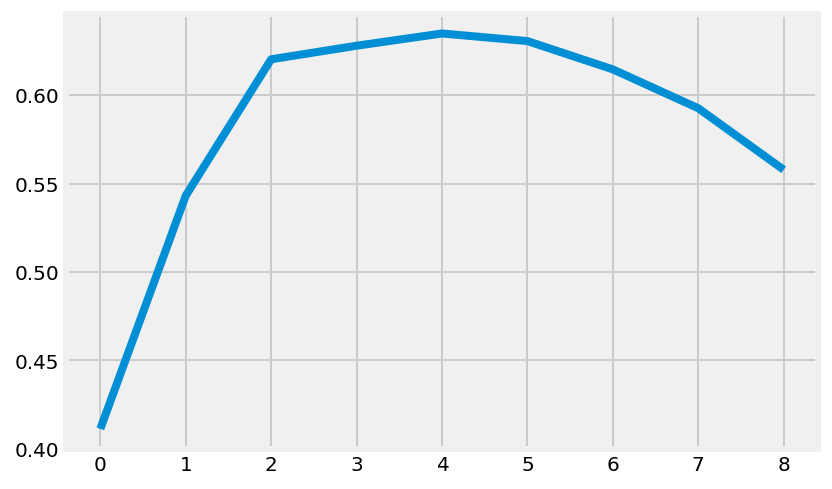

In [191]:

plt.plot(test_scores)

---

### 9. Fit a `Lasso` model and examine its coefficients

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

- Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
- What percent of the variables in the original dataset are "zeroed-out" by the lasso?
- What are the most important predictors for how many shots Kobe made in a game?

In [187]:
alpha_values = [0.01, 0.1, 1.0, 10, 100]
test_scores_las = []
for a in alpha_values:
    X = kobe.drop('SHOTS_MADE', axis = 1)
    y = kobe['SHOTS_MADE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


    las = Lasso(alpha = a)

    las.fit(X_train, y_train)


    las_r2_train = las.score(X_train, y_train)
    las_r2_test = las.score(X_test, y_test)
    
    print a
    print "R2 on train: {}".format(las_r2_train)
    print "R2 on test: {}".format(las_r2_test)
    print "\n"
    test_scores_las.append(las_r2_test)

#plt.plot(test_scores_las)

0.01
R2 on train: 0.681729372608
R2 on test: 0.622862574969


0.1
R2 on train: 0.655692573873
R2 on test: 0.622512251673


1.0
R2 on train: 0.603379933925
R2 on test: 0.621943753723


10
R2 on train: 0.552290576589
R2 on test: 0.579376908237


100
R2 on train: 0.535843426996
R2 on test: 0.55781973013




---

### 10. Tune the alpha for your `Lasso` model

How does this influence the coefficients? The model performance on the train and the test sets?

In [9]:
# A:

---

### 11. Synthesize what you've discovered

Write a couple of sentences telling the story: 
- How did a standard linear regression perform on the Kobe dataset? What qualities of this dataset caused these results>
- How did a Ridge perform in comparison? What clues could you glean from its coefficients? How does `alpha` seem to dictate the coefficients?
- What about the the `Lasso`?
- When will be useful?

In [10]:
# A: